In [1]:
import xgi
import numpy as np
import random
import matplotlib.pyplot as plt
from statistics import mean
import pandas as pd
import plotly.express as px

# Function

In [97]:
def add_hyperedge(H, labels, p, q, num_ext, num_new):
    e_prime = [] # create an empty new edge called e_prime

    ## randomly select an existing hyperedge e to start with
    e_num = random.randint(0, H.num_edges - 1)
    e = H.edges.members()[e_num]
    e_size = H.edges.size.asdict().get(e_num)

    ## randomly select a node u from e
    u_num = random.randint(0, e_size - 1)
    u = list(e)[u_num]
    u_label = H.nodes.attrs.asdict().get(u).get("label")
    e_prime.append(u)

    ## add other nodes from e to e_prime
    # add node with same label as u with prob p
    # add node with different label from u with prob q
    for node in e:
        if H.nodes.attrs.asdict().get(node).get("label") == u_label:
            prob = p
        else:
            prob = q
        if random.random() < prob:
            e_prime.append(node)
    
    ## add exterior nodes
    for i in range(0, num_ext):
        if len(list(H.nodes - e)) > 0:
            exterior_node = random.sample(list(H.nodes - e), 1)[0] # randomly sample a node from outside the existing hyperedge
            e_prime.append(exterior_node)
        # else:
        #     print("No remaining exterior nodes, one failed to add")

    ## add new nodes
    for i in range(0, num_new):
        new_node = len(H.nodes) + 1
        H.add_node(new_node)
        new_label = np.random.choice([labels[0], labels[1]])
        H.set_node_attributes({new_node : new_label}, name = "label")
        e_prime.append(new_node)

    H.add_edge(e_prime)

    return(e, u, e_prime)

# Simulation

In [98]:
data = []
for p in np.arange(0, 1.1, 0.1):
    for q in np.arange(0, 1.1, 0.1):
        ## Create initial hypergraph
        H= xgi.Hypergraph([[1,2]]) # create hypergraph
        H.set_node_attributes({1 : 0, 2 : 1}, name = "label") # set node labels
        e_u = 0
        e_u_kept = 0
        e_r = 0
        e_r_kept = 0
        for i in range(0, 100):
            e, u, e_prime = add_hyperedge(H, [0,1], p, q, 1, 1)
            u_label = H.nodes.attrs.asdict().get(u).get("label")
            for node in e:
                if (H.nodes.attrs.asdict().get(node).get("label") == u_label) and (node != u):
                    e_u += 1
                    if node in e_prime:
                        e_u_kept += 1
                elif (H.nodes.attrs.asdict().get(node).get("label") != u_label):
                    e_r += 1
                    if node in e_prime:
                        e_r_kept += 1
        p_mle = e_u_kept/e_u
        q_mle = e_r_kept/e_r
        data.append([p, p_mle, q, q_mle])
data = np.array(data)

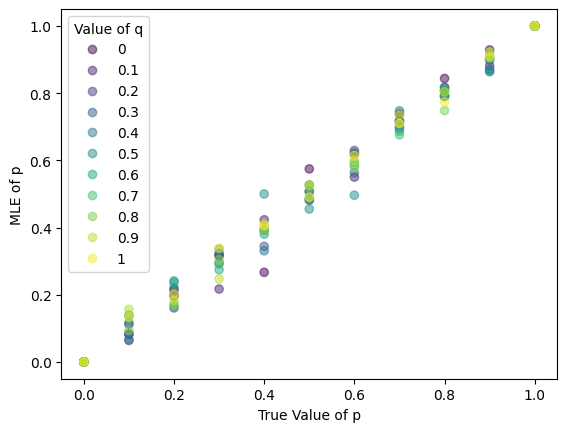

In [99]:
fig, ax = plt.subplots()
scatter = plt.scatter(data[:,0], data[:,1], c = data[:,2], alpha= 0.5)
handles, labels = scatter.legend_elements()
legend = ax.legend(handles = handles, labels = ["0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1"], title="Value of q")
plt.xlabel("True Value of p")
plt.ylabel("MLE of p")
plt.show()

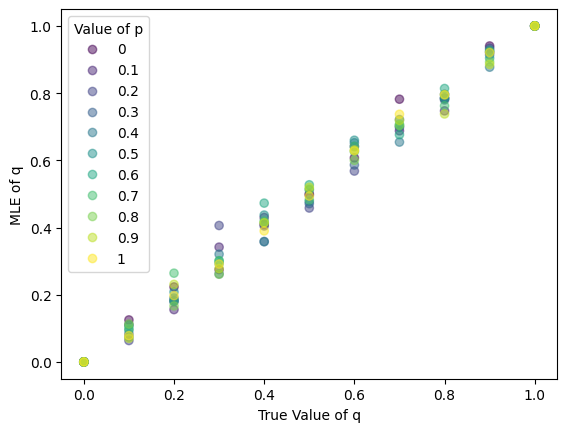

In [100]:
fig, ax = plt.subplots()
scatter = plt.scatter(data[:,2], data[:,3], c = data[:,0], alpha= 0.5)
handles, labels = scatter.legend_elements()
legend = ax.legend(handles = handles, labels = ["0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1"], title="Value of p")
plt.xlabel("True Value of q")
plt.ylabel("MLE of q")
plt.show()